In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:

df = pd.read_csv('sales_data_sample.csv',  encoding="ISO-8859-1")

df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [208]:
df.DEALSIZE.value_counts()

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='Quantity'>

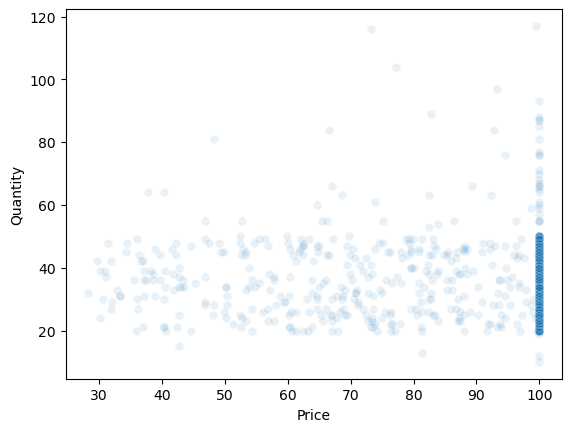

In [123]:
sns.scatterplot(data =classic_cars, x = classic_cars.Price,y = classic_cars.Quantity, alpha=0.1)


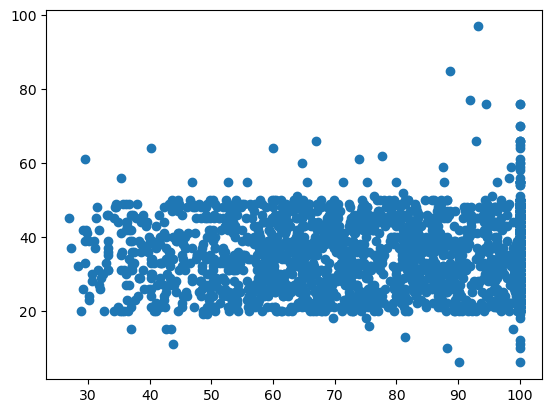

In [104]:
plt.scatter(df.PRICEEACH, df.QUANTITYORDERED)

In [25]:
len(df.ORDERNUMBER.unique())

307

In [28]:
df.PRODUCTLINE.unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [32]:
len(df.COUNTRY.unique())

19

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [4]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [5]:
df['UNIQUE_DAYS_WITH_SALES'] = df['ORDERDATE']

In [6]:
aggregate_df =df.set_index('ORDERDATE').groupby(['PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY', 'DEALSIZE']).resample('M').agg(
    {
        'QUANTITYORDERED': np.sum,
        'PRICEEACH': np.mean,
        'PRODUCTCODE': len,
        'UNIQUE_DAYS_WITH_SALES': lambda dates: len(set(dates))
        
    }
).rename(
    columns= {
        
        'QUANTITYORDERED': 'Quantity',
        'PRICEEACH': 'Price',
        'PRODUCTCODE': 'Total_transactions'
         
        
    }
   

).reset_index()
aggregate_df

,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE,ORDERDATE,Quantity,Price,Total_transactions,UNIQUE_DAYS_WITH_SALES
0,Classic Cars,S10_1949,Australia,Large,2003-11-30,34,100.00,1,1
1,Classic Cars,S10_1949,Australia,Medium,2004-07-31,21,100.00,1,1
2,Classic Cars,S10_1949,Australia,Medium,2004-08-31,0,NaN,0,0
3,Classic Cars,S10_1949,Australia,Medium,2004-09-30,0,NaN,0,0
4,Classic Cars,S10_1949,Australia,Medium,2004-10-31,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...
9204,Vintage Cars,S50_1341,USA,Small,2004-12-31,0,NaN,0,0
9205,Vintage Cars,S50_1341,USA,Small,2005-01-31,0,NaN,0,0
9206,Vintage Cars,S50_1341,USA,Small,2005-02-28,0,NaN,0,0
9207,Vintage Cars,S50_1341,USA,Small,2005-03-31,0,NaN,0,0


In [219]:
aggregate_df.dropna(inplace=True)
aggregate_df

,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE,ORDERDATE,Quantity,Price,Total_transactions,UNIQUE_DAYS_WITH_SALES
0,Classic Cars,S10_1949,Australia,Large,2003-11-30,34,100.00,1,1
1,Classic Cars,S10_1949,Australia,Medium,2004-07-31,21,100.00,1,1
5,Classic Cars,S10_1949,Australia,Medium,2004-11-30,30,100.00,1,1
6,Classic Cars,S10_1949,Australia,Small,2005-03-31,24,100.00,1,1
7,Classic Cars,S10_1949,Canada,Large,2003-12-31,47,100.00,1,1
...,...,...,...,...,...,...,...,...,...
9190,Vintage Cars,S50_1341,USA,Small,2003-10-31,48,51.93,1,1
9192,Vintage Cars,S50_1341,USA,Small,2003-12-31,29,38.40,1,1
9197,Vintage Cars,S50_1341,USA,Small,2004-05-31,36,51.93,1,1
9202,Vintage Cars,S50_1341,USA,Small,2004-10-31,47,43.64,1,1


In [200]:
agg = aggregate_df[aggregate_df['Price'] ==100]
agg.ORDERDATE.value_counts()

ORDERDATE
2003-11-30    122
2004-11-30    108
2003-10-31     74
2004-10-31     74
2004-08-31     63
2005-05-31     59
2004-12-31     52
2005-02-28     50
2004-09-30     47
2005-01-31     45
2004-07-31     40
2004-02-29     40
2003-09-30     40
2005-03-31     40
2004-01-31     38
2004-05-31     37
2003-12-31     33
2004-06-30     32
2004-03-31     30
2003-07-31     26
2003-05-31     25
2003-04-30     25
2004-04-30     25
2003-03-31     24
2003-01-31     23
2003-08-31     22
2005-04-30     20
2003-06-30     17
2003-02-28     16
Name: count, dtype: int64

In [14]:
aggregate_df[aggregate_df['Quantity']<0]

,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE,ORDERDATE,Quantity,Price,Total_transactions,UNIQUE_DAYS_WITH_SALES


(array([929.,   0.,   0.,   0.,   0.,   0., 310.,   0.,   0.,   0.,   0.,
          0.,   0., 306.,   0.,   0.,   0.,   0.,   0.,   0., 227.,   0.,
          0.,   0.,   0.,   0.,  75.,   0.,   0.,   0.,   0.,   0.,   0.,
        297.,   0.,   0.,   0.,   0.,   0., 599.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  , 3.15,
        3.3 , 3.45, 3.6 , 3.75, 3.9 , 4.05, 4.2 , 4.35, 4.5 , 4.65, 4.8 ,
        4.95, 5.1 , 5.25, 5.4 , 5.55, 5.7 , 5.85, 6.  ]),
 <BarContainer object of 40 artists>)

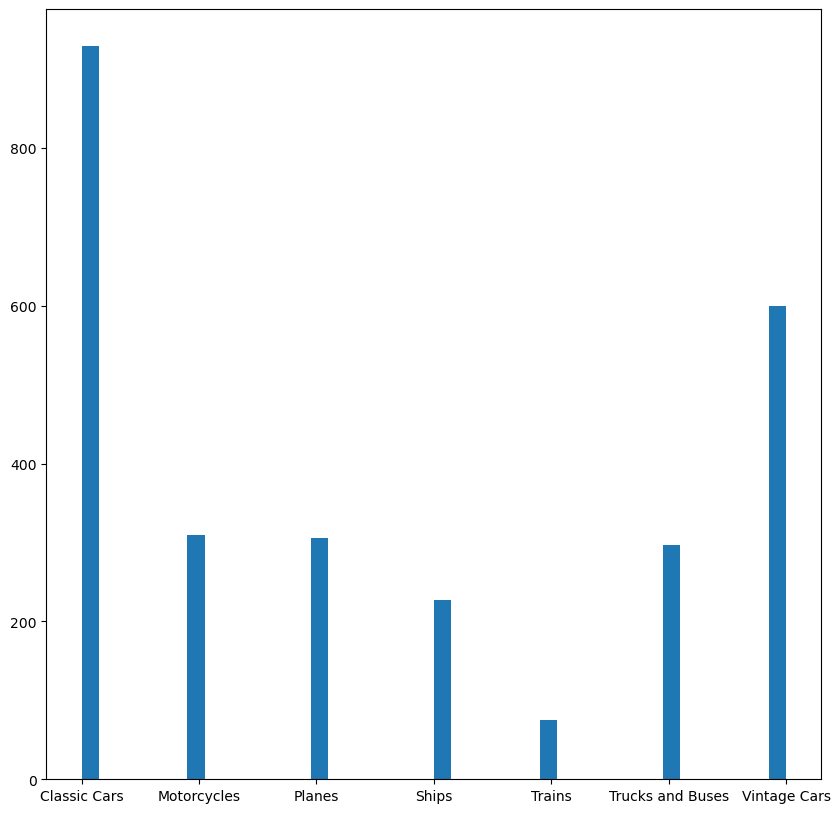

In [182]:
plt.figure(figsize=(10,10))
plt.hist(aggregate_df.PRODUCTLINE, bins = 40)

(array([  37.,   84.,  100.,  152.,  184.,  191.,  202.,  175.,  207.,
        1443.]),
 array([ 26.88 ,  34.192,  41.504,  48.816,  56.128,  63.44 ,  70.752,
         78.064,  85.376,  92.688, 100.   ]),
 <BarContainer object of 10 artists>)

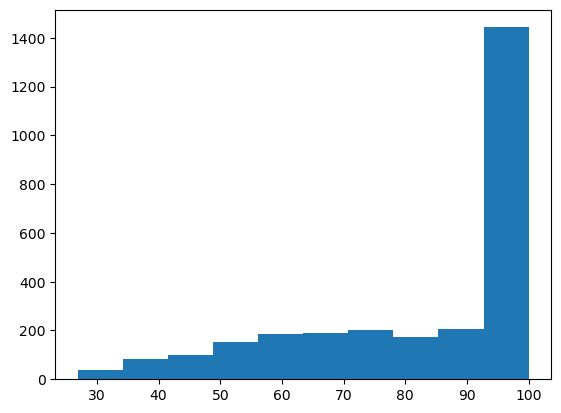

In [245]:
plt.hist(aggregate_df.Price)

In [93]:
aggregate_df.COUNTRY

0       Australia
1       Australia
2       Australia
3       Australia
4       Australia
          ...    
9777          USA
9778          USA
9779          USA
9780          USA
9781          USA
Name: COUNTRY, Length: 9782, dtype: object

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


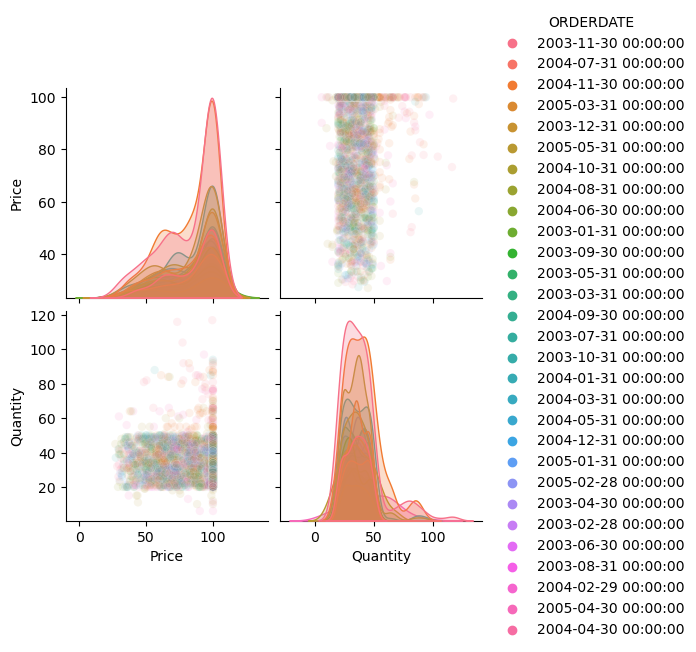

In [201]:
sns.pairplot(aggregate_df[['Price','Quantity','ORDERDATE']], hue = 'ORDERDATE', plot_kws={'alpha':0.1})


C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


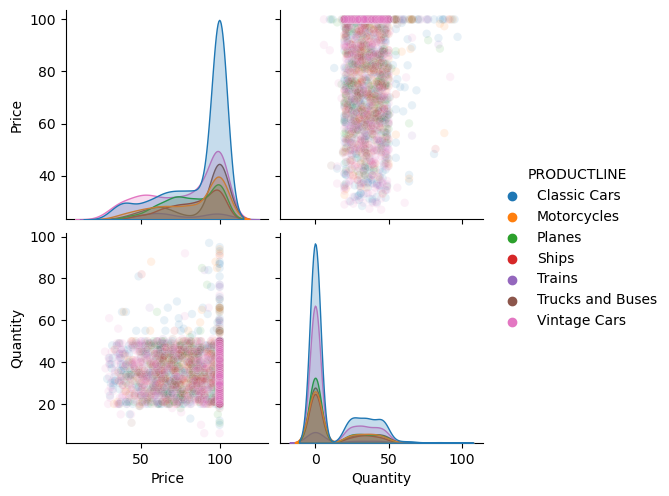

In [37]:
sns.pairplot(aggregate_df[['Price','Quantity','PRODUCTLINE']], hue = 'PRODUCTLINE', plot_kws={'alpha':0.1})


### Variable DEALSIZE is the optimal variable to split data since quantity and price behave in a different way

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


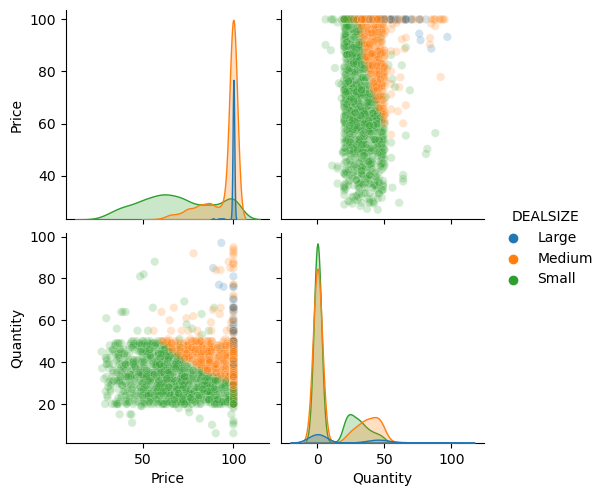

In [47]:
sns.pairplot(aggregate_df[['Price','Quantity','DEALSIZE']], hue = 'DEALSIZE', plot_kws={'alpha':0.2})


## Modelling small size data


<Axes: xlabel='Price', ylabel='Quantity'>

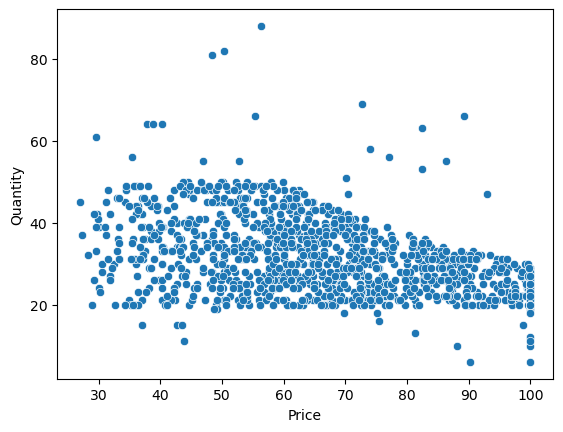

In [40]:
small_size = aggregate_df[aggregate_df['DEALSIZE'] == 'Small']
small_size.head()
small_size.shape
sns.scatterplot(x = small_size.Price, y = small_size.Quantity )

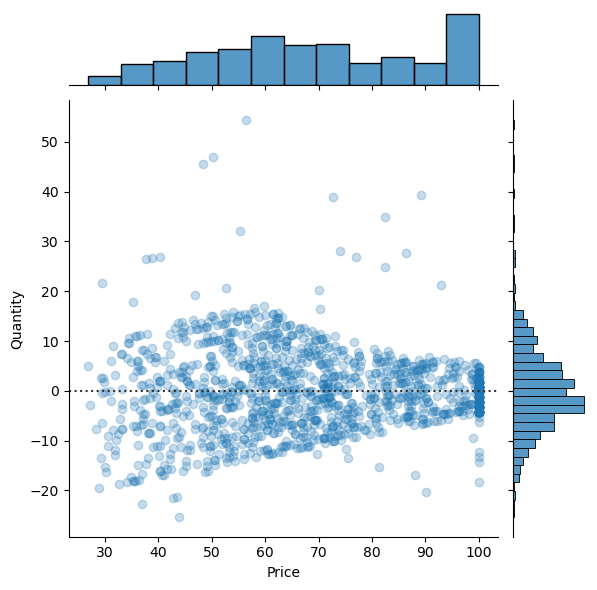

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


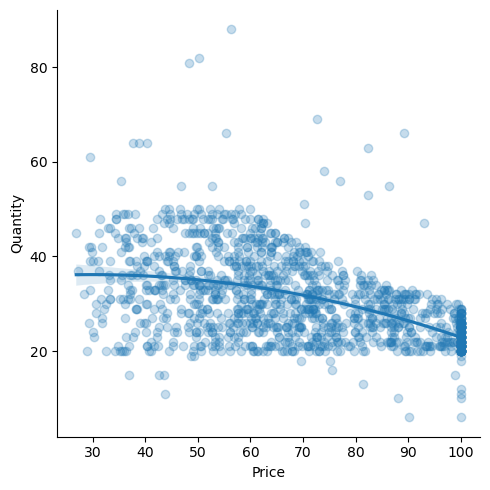

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


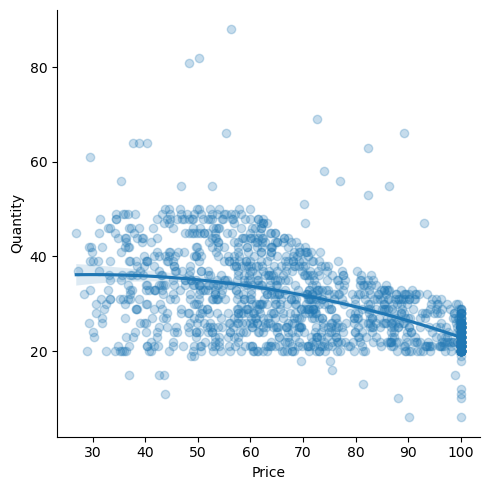

In [39]:

sns.jointplot(x='Price', y='Quantity', data=small_size,kind="resid", scatter_kws={'alpha': 0.25})
plt.show()
sns.lmplot(x='Price', y='Quantity', data=small_size, order=2, scatter_kws={'alpha': 0.25})
plt.show()
sns.lmplot(x='Price', y='Quantity', data=small_size, order=2, scatter_kws={'alpha': 0.25})
plt.show()


Graphically it seems that a polinomial model will fit the data better and the residuals doesn't follow a normal distribution which shows that the model do not catpure the variability.
Therefore, build the models and observe R2.

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     354.5
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           6.74e-70
Time:                        18:50:46   Log-Likelihood:                -4461.8
No. Observations:                1266   AIC:                             8928.
Df Residuals:                    1264   BIC:                             8938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6773      0.818     55.870      0.0

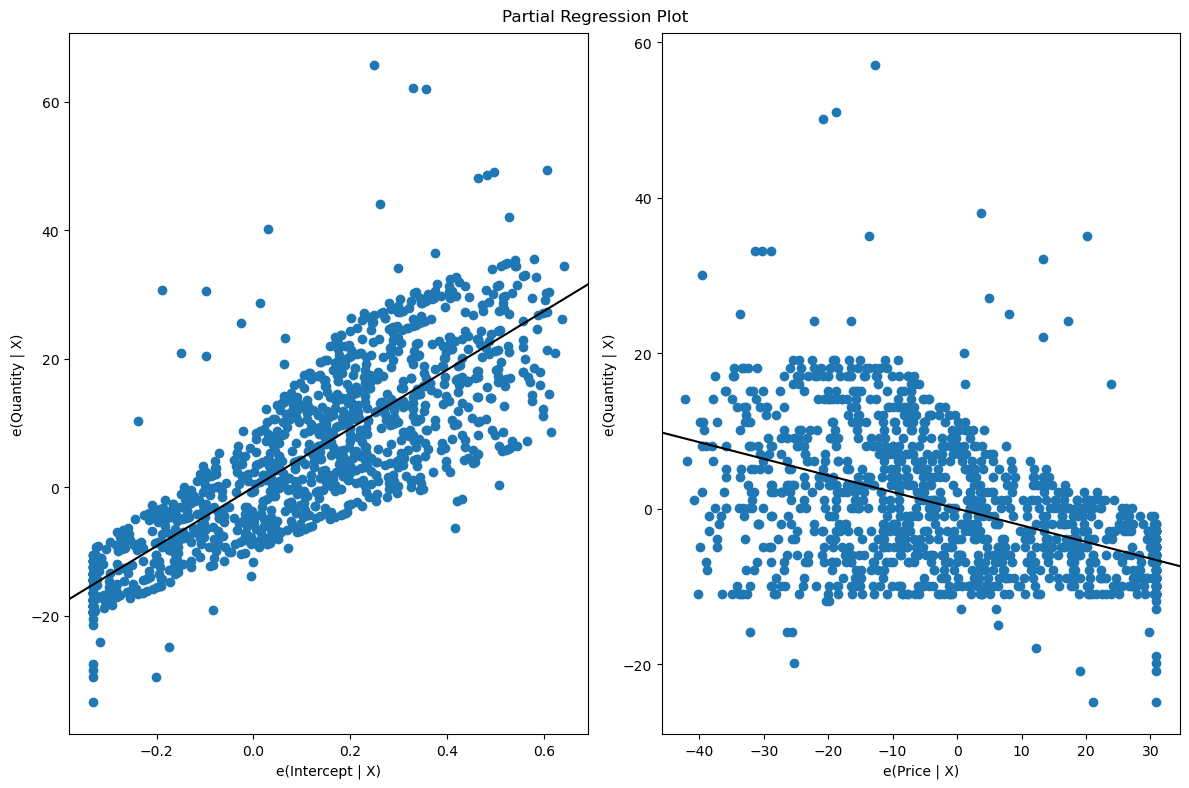

In [44]:
small_model = ols("Quantity ~ Price", data=small_size).fit()
print(small_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(small_model, fig=fig)

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     190.5
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           4.95e-73
Time:                        18:26:31   Log-Likelihood:                -4451.4
No. Observations:                1266   AIC:                             8909.
Df Residuals:                    1263   BIC:                             8924.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        37.4046      1.982     18.874

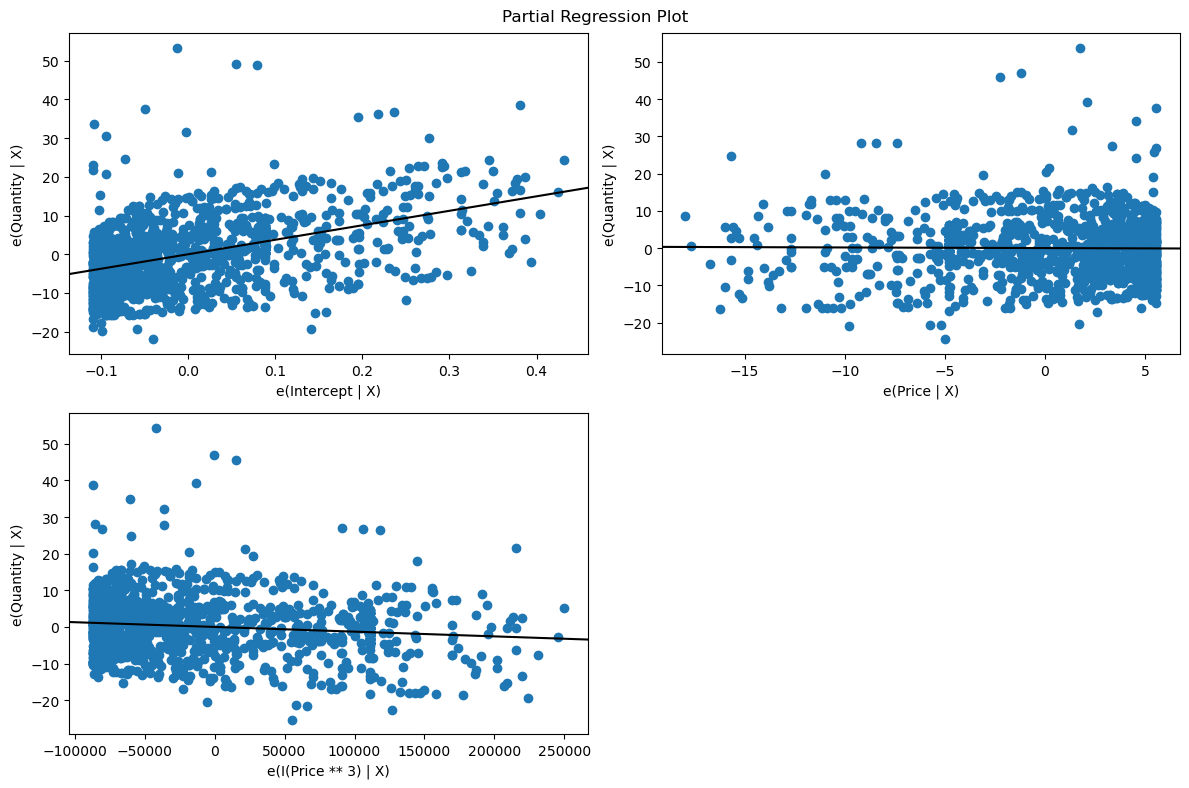

In [35]:
#Quantity = β0 + β1 * Price + β2 * Price^2 + ε

poly_degree = 2
formula = f'Quantity ~ Price + I(Price**{poly_degree})'  #I(Price**2) indicates that the expression inside I() is a squared term of the predictor variable Price.
small_model = sm.formula.ols(formula, data=small_size).fit()

# Display model summary
print(small_model.summary())

# Plot partregress grid
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(small_model, fig=fig)
plt.show()

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.66e-72
Time:                        18:49:51   Log-Likelihood:                -4449.8
No. Observations:                1266   AIC:                             8908.
Df Residuals:                    1262   BIC:                             8928.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.8071      8.543      2.670

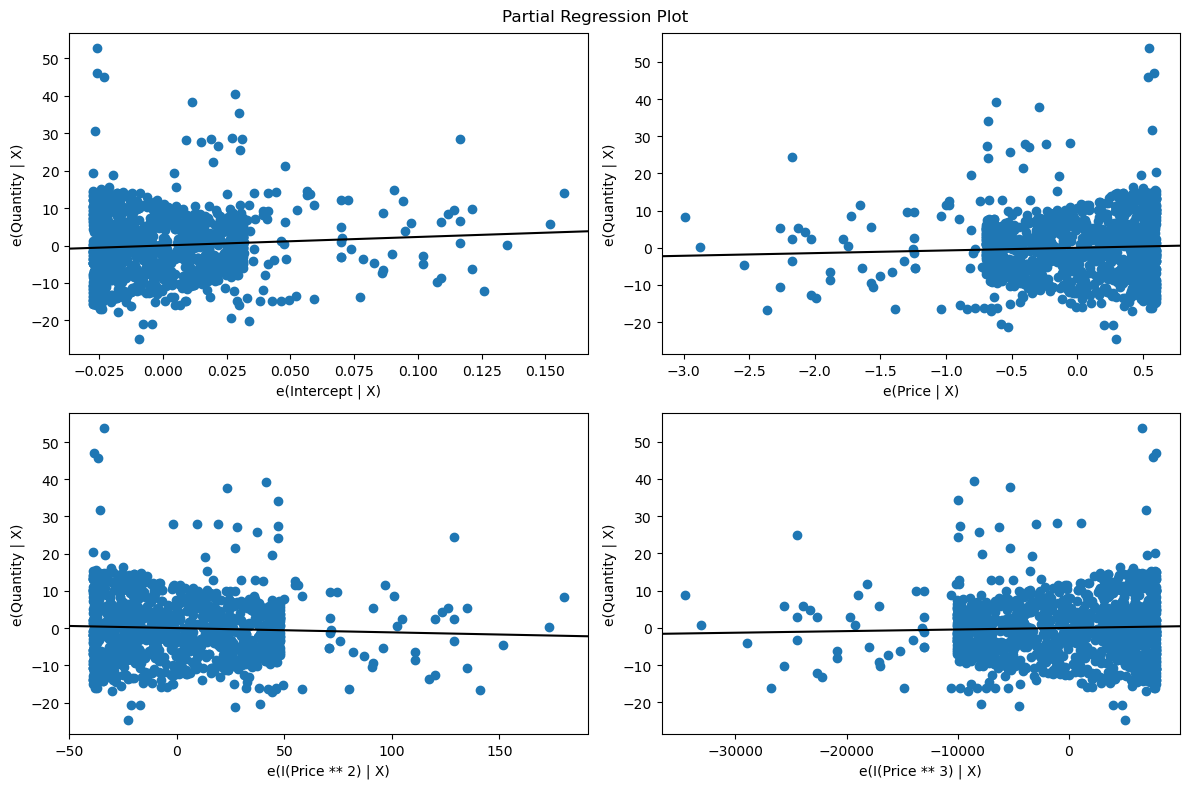

In [41]:
poly_degree = 3
formula = f'Quantity ~ Price + I(Price**2) + I(Price**3)'  # Polynomial regression formula with degree 2
small_model = sm.formula.ols(formula, data=small_size).fit()

# Display model summary
print(small_model.summary())

# Plot partregress grid
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(small_model, fig=fig)
plt.show()

# Medium size data

<Axes: xlabel='Price', ylabel='Quantity'>

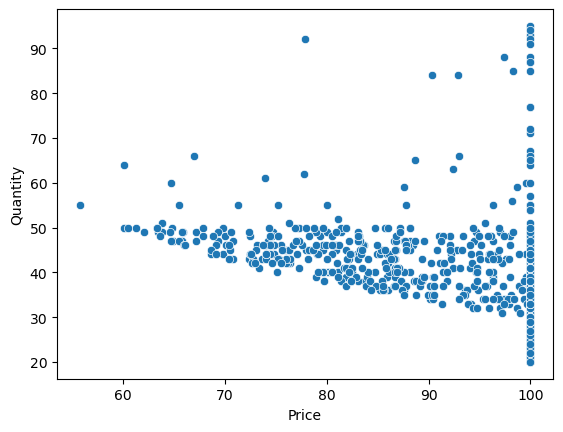

In [55]:
Medium_size = aggregate_df[aggregate_df['DEALSIZE'] == 'Medium']
Medium_size.head()
Medium_size.shape
sns.scatterplot(x = Medium_size.Price, y = Medium_size.Quantity )

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     182.3
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           4.71e-39
Time:                        18:55:02   Log-Likelihood:                -4975.1
No. Observations:                1353   AIC:                             9954.
Df Residuals:                    1351   BIC:                             9965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.9260      2.761     27.498      0.0

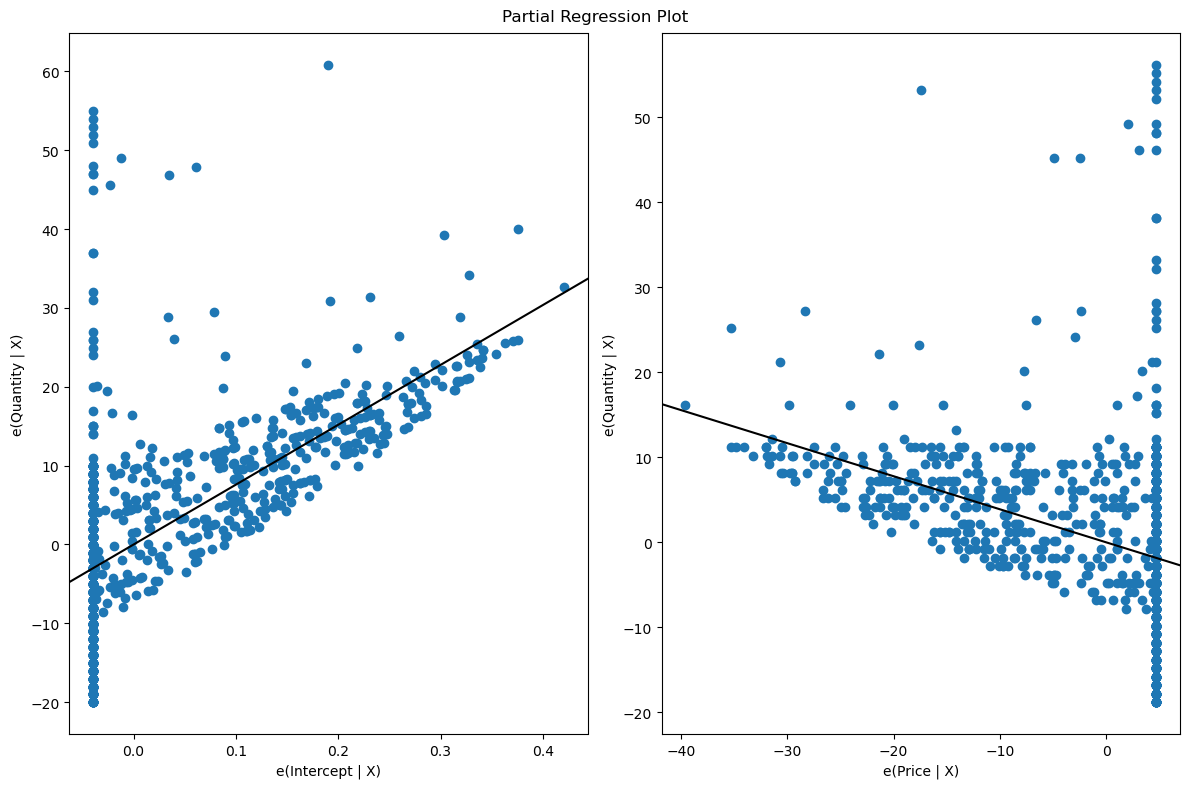

In [57]:
medium_model = ols("Quantity ~ Price", data=Medium_size).fit()
print(medium_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(medium_model, fig=fig)

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


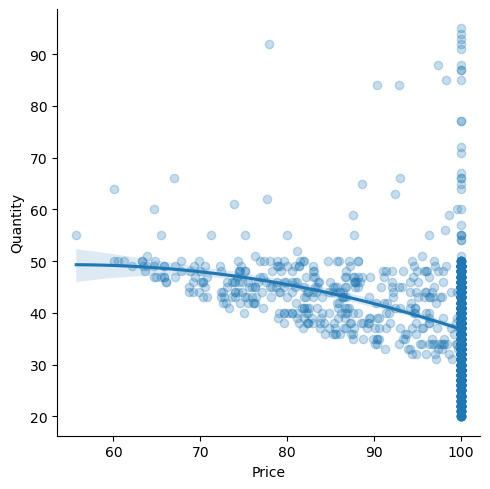

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


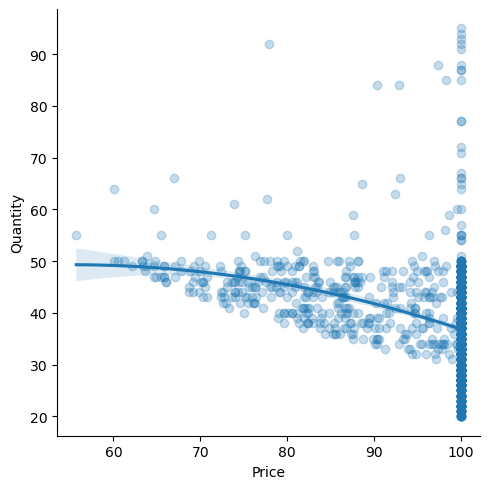

In [59]:
sns.lmplot(x='Price', y='Quantity', data=Medium_size, order=2, scatter_kws={'alpha': 0.25})
plt.show()
sns.lmplot(x='Price', y='Quantity', data=Medium_size, order=2, scatter_kws={'alpha': 0.25})
plt.show()

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     93.29
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.13e-38
Time:                        18:59:45   Log-Likelihood:                -4973.1
No. Observations:                1353   AIC:                             9952.
Df Residuals:                    1350   BIC:                             9968.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        30.4641     23.111      1.318

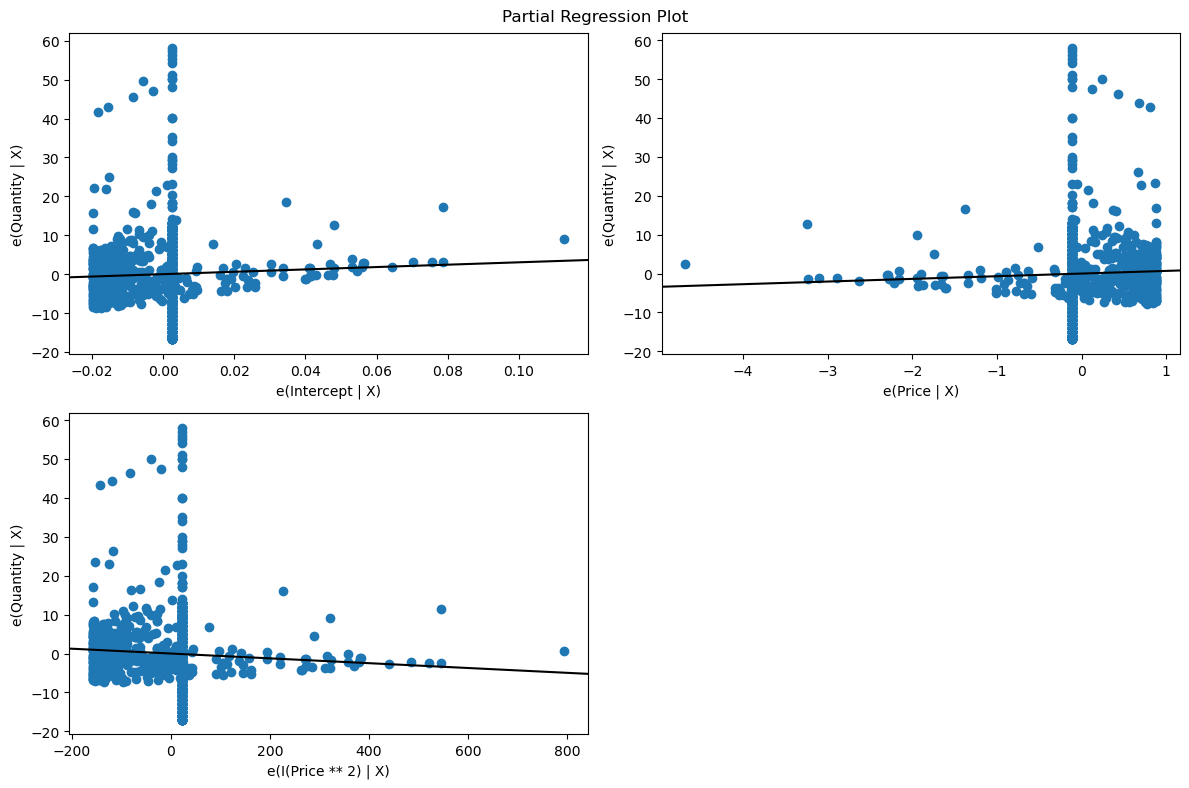

In [62]:
poly_degree = 2
formula = f'Quantity ~ Price + I(Price**{poly_degree})'  #I(Price**2) indicates that the expression inside I() is a squared term of the predictor variable Price.
medium_model = sm.formula.ols(formula, data=Medium_size).fit()

# Display model summary
print(medium_model.summary())

# Plot partregress grid
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(medium_model, fig=fig)
plt.show()

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     64.89
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           3.43e-39
Time:                        19:00:43   Log-Likelihood:                -4969.5
No. Observations:                1353   AIC:                             9947.
Df Residuals:                    1349   BIC:                             9968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       493.3280    173.696      2.840

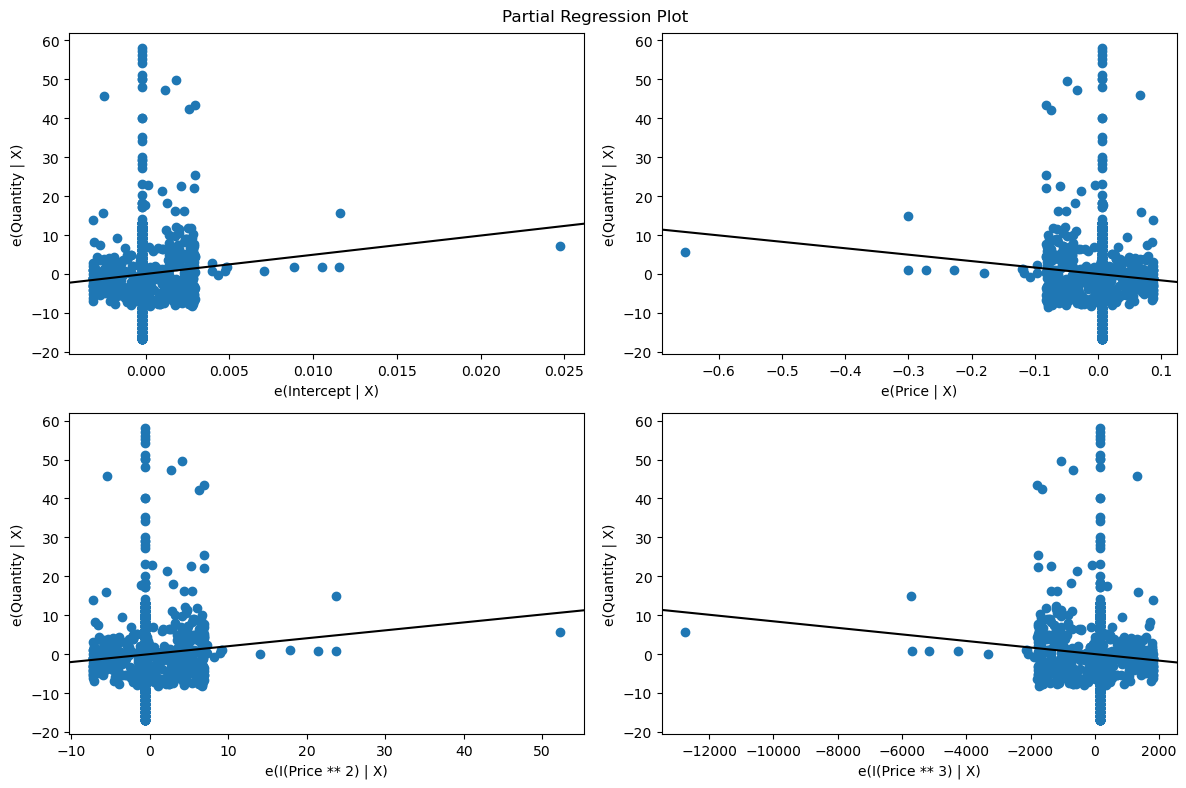

In [64]:
poly_degree = 3
formula = f'Quantity ~ Price + I(Price**2) + I(Price**3)'  # Polynomial regression formula with degree 2
medium_model = sm.formula.ols(formula, data=Medium_size).fit()

# Display model summary
print(medium_model.summary())

# Plot partregress grid
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(medium_model, fig=fig)
plt.show()

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     40.34
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           9.69e-39
Time:                        19:01:51   Log-Likelihood:                -4966.3
No. Observations:                1353   AIC:                             9945.
Df Residuals:                    1347   BIC:                             9976.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.159e+04   7170.427      1.616

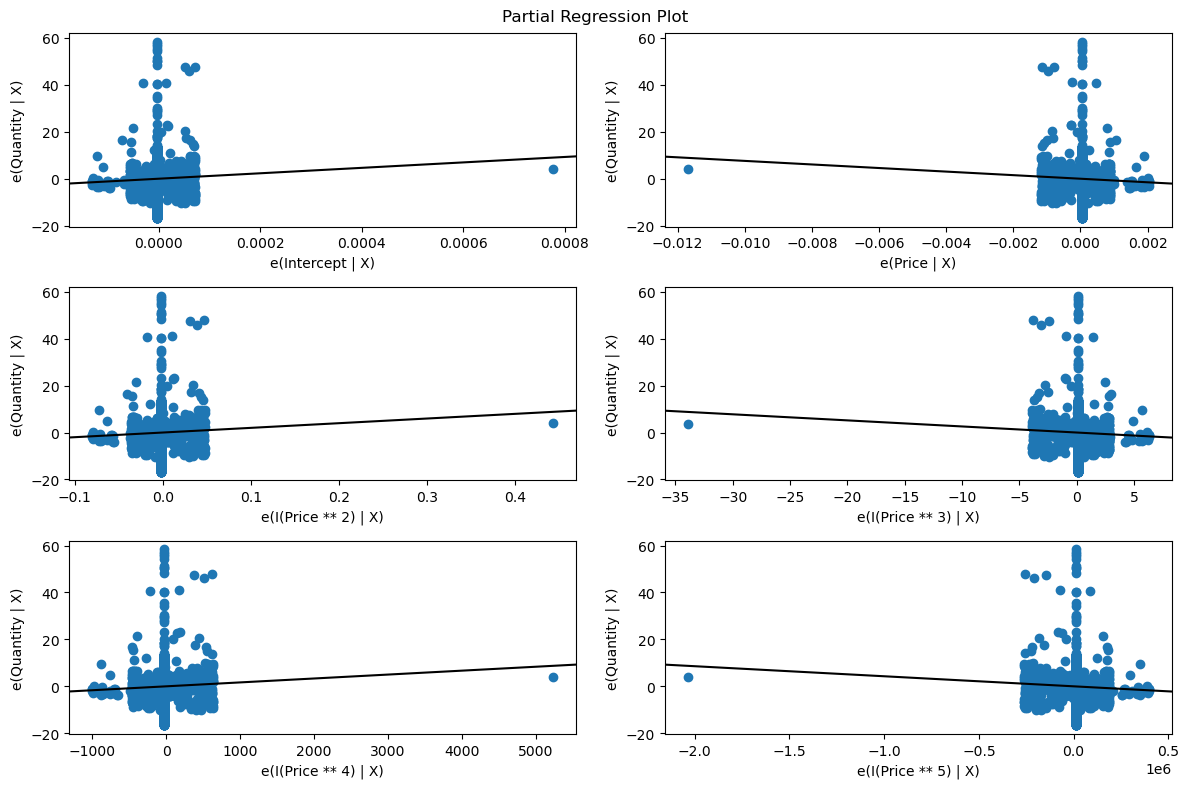

In [67]:
poly_degree = 5
formula = f'Quantity ~ Price + I(Price**2) + I(Price**3) + I(Price**4) + I(Price**5)'  # Polynomial regression formula with degree 5
medium_model = sm.formula.ols(formula, data=Medium_size).fit()

# Display model summary
print(medium_model.summary())

# Plot partregress grid
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(medium_model, fig=fig)
plt.show()

## Large size data

<Axes: xlabel='Price', ylabel='Quantity'>

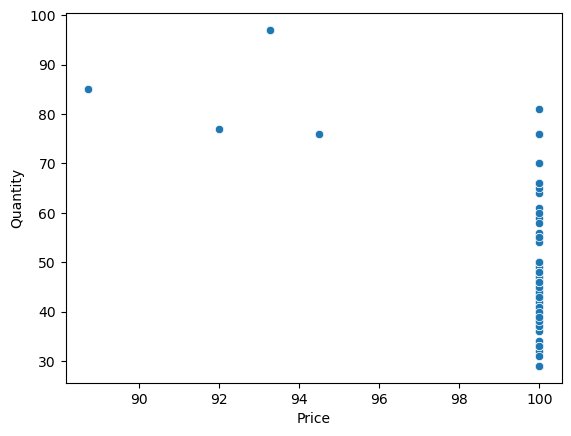

In [73]:
Large_size = aggregate_df[aggregate_df['DEALSIZE'] == 'Large']
Large_size.head()
Large_size.shape
sns.scatterplot(x = Large_size.Price, y = Large_size.Quantity )

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Edua

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


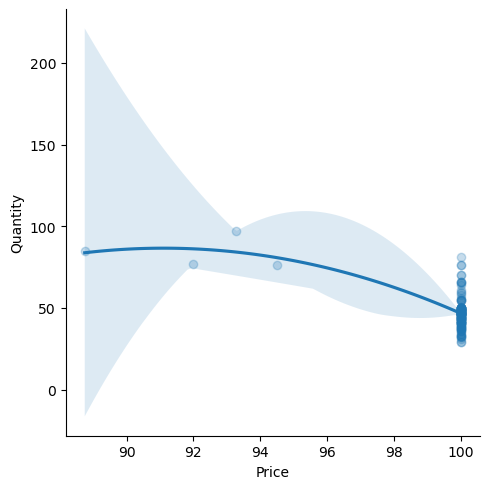

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Edua

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Eduardo

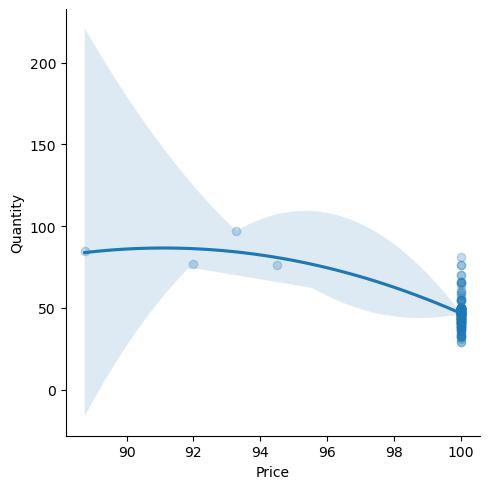

In [74]:
sns.lmplot(x='Price', y='Quantity', data=Large_size, order=2, scatter_kws={'alpha': 0.25})
plt.show()
sns.lmplot(x='Price', y='Quantity', data=Large_size, order=2, scatter_kws={'alpha': 0.25})
plt.show()

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     65.97
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.38e-13
Time:                        19:06:17   Log-Likelihood:                -558.90
No. Observations:                 156   AIC:                             1122.
Df Residuals:                     154   BIC:                             1128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    488.2215     54.263      8.997      0.0

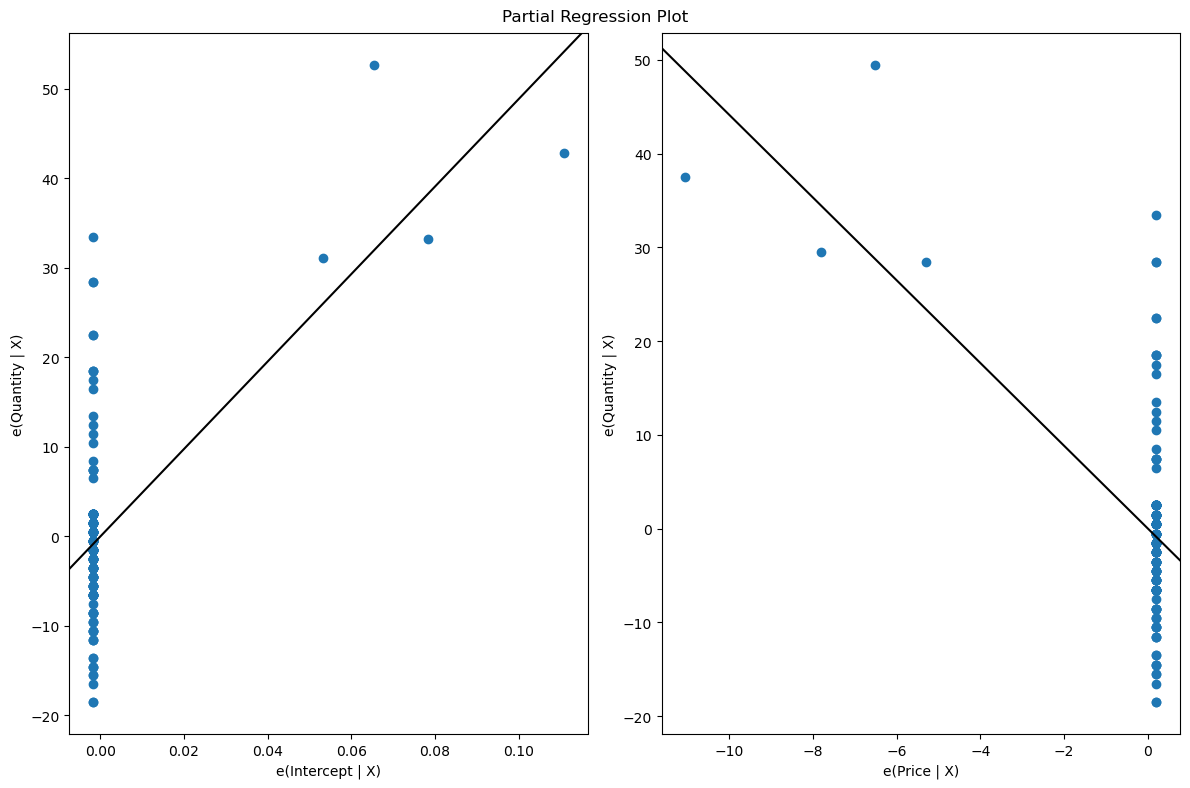

In [78]:
large_model = ols("Quantity ~ Price", data=Large_size).fit()
print(large_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(large_model, fig=fig)

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     35.95
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.59e-13
Time:                        19:06:40   Log-Likelihood:                -556.66
No. Observations:                 156   AIC:                             1119.
Df Residuals:                     153   BIC:                             1128.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4113.3474   2179.797     -1.887

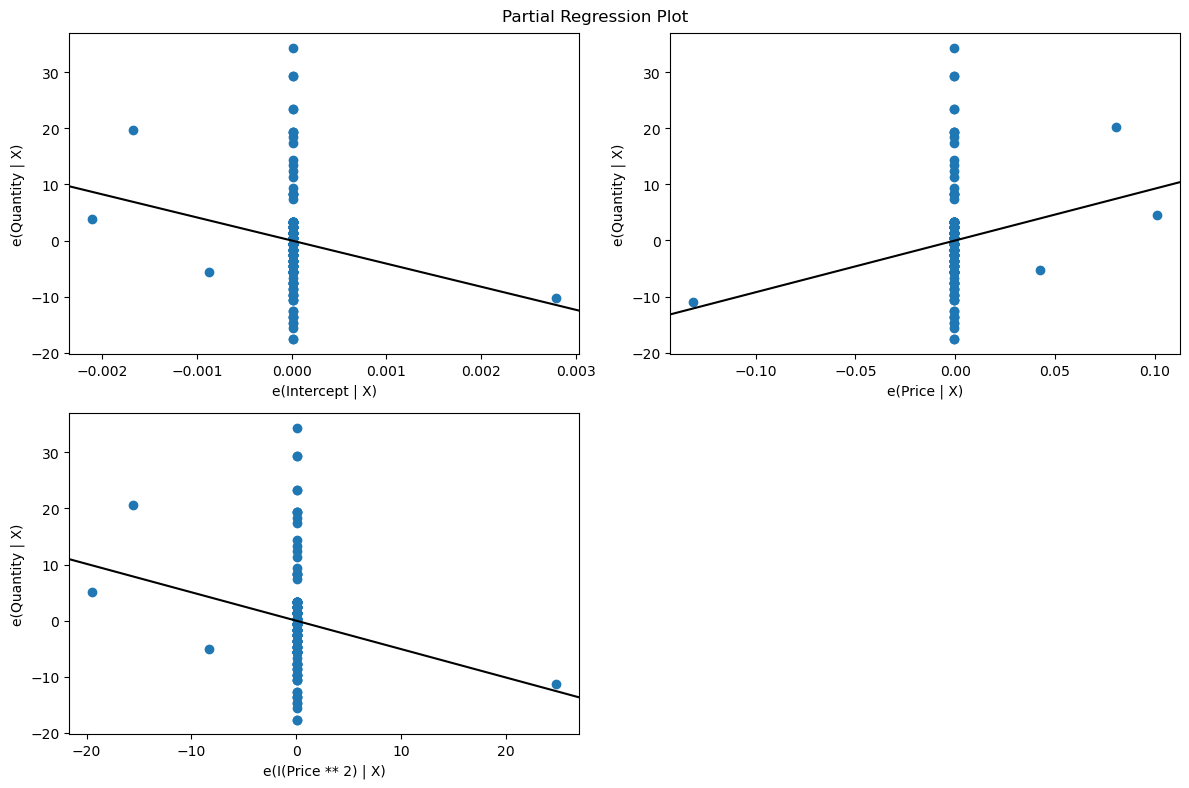

In [79]:
poly_degree = 2
formula = f'Quantity ~ Price + I(Price**2)'  # Polynomial regression formula with degree 2
large_model = sm.formula.ols(formula, data=Large_size).fit()

# Display model summary
print(large_model.summary())

# Plot partregress grid
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(large_model, fig=fig)
plt.show()

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     23.85
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.05e-12
Time:                        19:07:13   Log-Likelihood:                -556.63
No. Observations:                 156   AIC:                             1121.
Df Residuals:                     152   BIC:                             1133.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0035      0.019      0.180

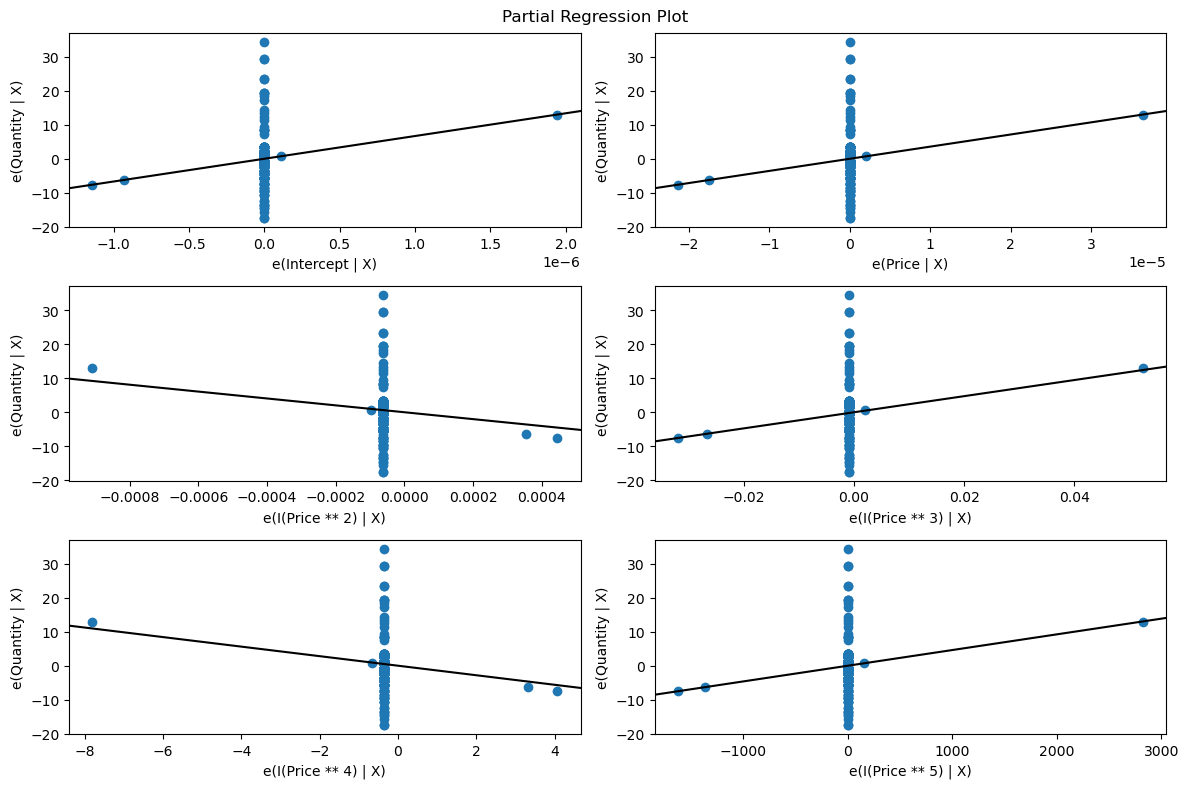

In [80]:
poly_degree = 5
formula = f'Quantity ~ Price + I(Price**2) + I(Price**3) +I(Price**4) +I(Price**5)'  # Polynomial regression formula with degree 2
large_model = sm.formula.ols(formula, data=Large_size).fit()

# Display model summary
print(large_model.summary())

# Plot partregress grid
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(large_model, fig=fig)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

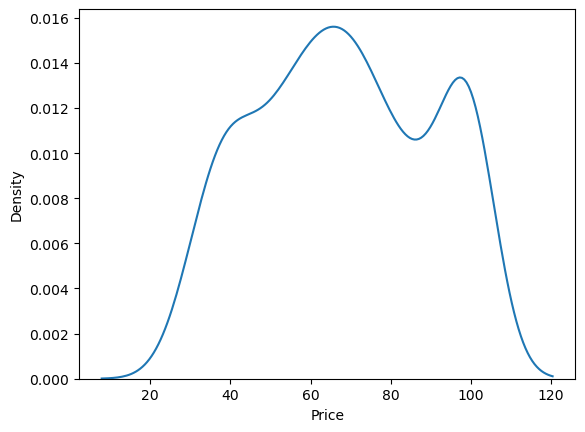

In [124]:
sns.kdeplot(classic_cars_small['Price'])

<Axes: xlabel='Price', ylabel='Density'>

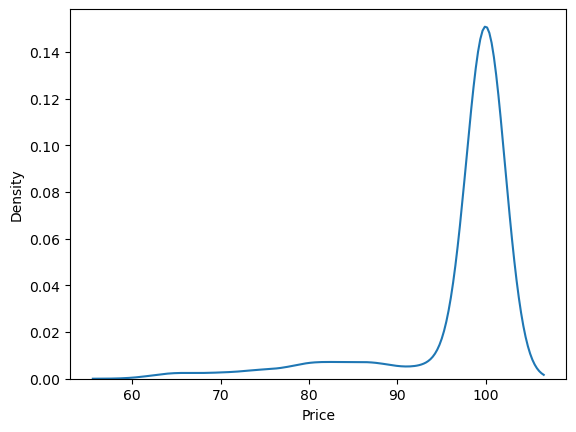

In [126]:
classic_cars_medium = aggregate_df[(aggregate_df['PRODUCTLINE'] == 'Classic Cars') & (aggregate_df['DEALSIZE'] == 'Medium')]
sns.kdeplot(classic_cars_medium['Price'])

<Axes: xlabel='Price', ylabel='Density'>

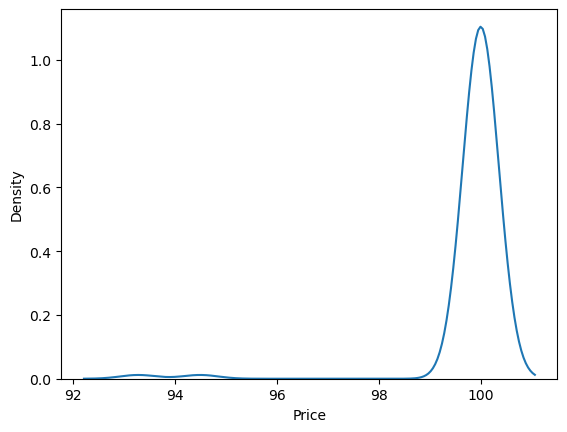

In [127]:
classic_cars_large = aggregate_df[(aggregate_df['PRODUCTLINE'] == 'Classic Cars') & (aggregate_df['DEALSIZE'] == 'Large')]
sns.kdeplot(classic_cars_large['Price'])

## 1. Classic Cars

<Axes: xlabel='Price', ylabel='Quantity'>

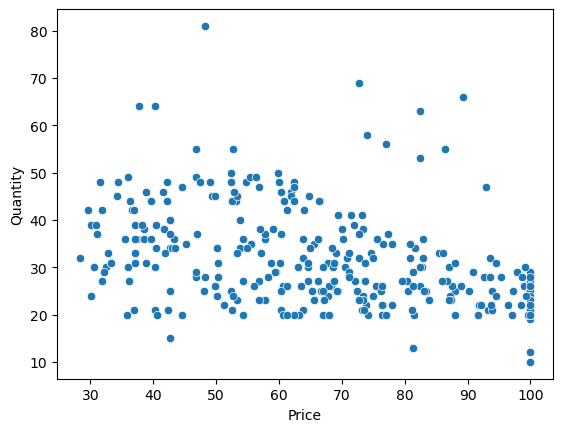

In [89]:
classic_cars_small = aggregate_df[(aggregate_df['PRODUCTLINE'] == 'Classic Cars') & (aggregate_df['DEALSIZE'] == 'Small')]
classic_cars.head()
classic_cars.shape
sns.scatterplot(x = classic_cars.Price, y = classic_cars.Quantity )


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     26.76
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.70e-15
Time:                        19:23:19   Log-Likelihood:                -1205.6
No. Observations:                 330   AIC:                             2419.
Df Residuals:                     326   BIC:                             2434.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.6451     18.377      1.831

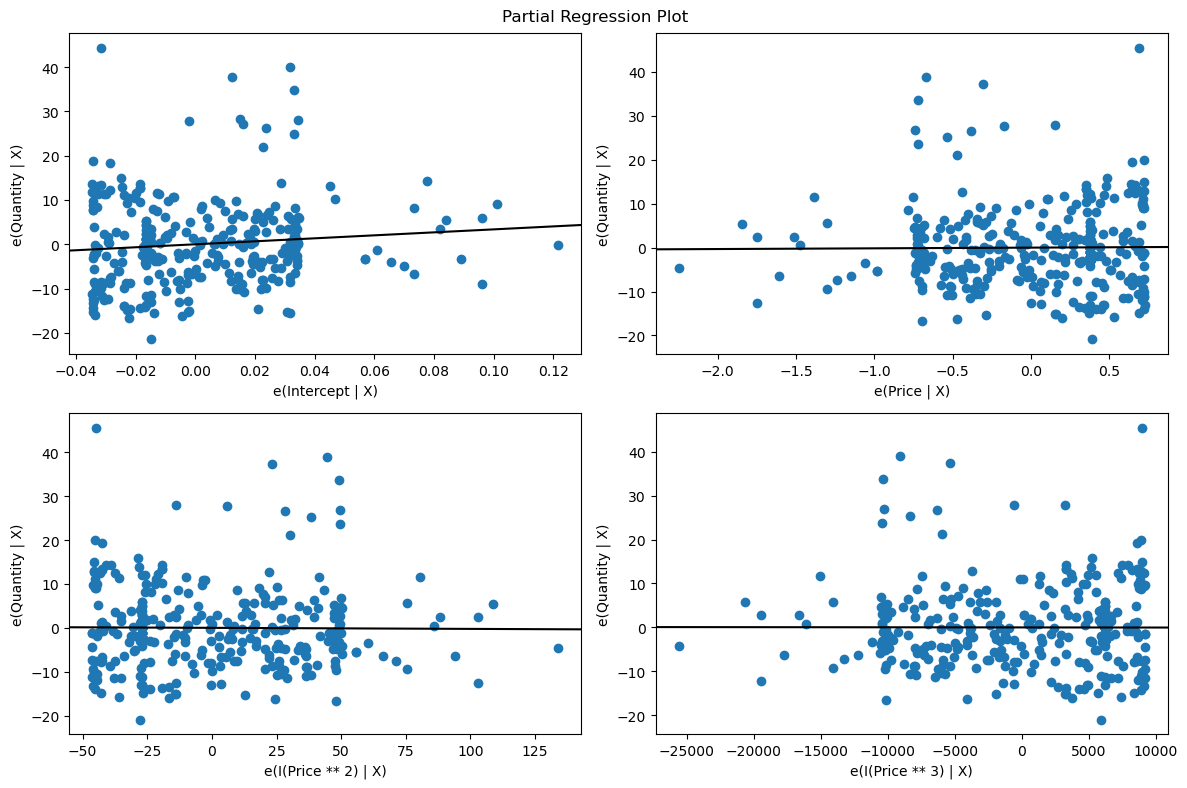

In [84]:
poly_degree = 3
formula = f'Quantity ~ Price + I(Price**2) + I(Price**3)'  # Polynomial regression formula with degree 2
classic_cars_model = sm.formula.ols(formula, data=classic_cars).fit()

# Display model summary
print(classic_cars_model.summary())

# Plot partregress grid
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(classic_cars_model, fig=fig)
plt.show()

# 2. Motorcycles

In [190]:
motorcycles = aggregate_df[(aggregate_df['PRODUCTLINE'] == 'Motorcycles')]
motorcycles

,PRODUCTLINE,PRODUCTCODE,COUNTRY,ORDERDATE,Quantity,Price,Total_transactions,UNIQUE_DAYS_WITH_SALES
3230,Motorcycles,S10_1678,Australia,2004-02-29,37,100.000,1,1
3240,Motorcycles,S10_1678,Australia,2004-12-31,20,72.550,1,1
3241,Motorcycles,S10_1678,Austria,2004-11-30,41,100.000,1,1
3242,Motorcycles,S10_1678,Finland,2004-09-30,23,100.000,1,1
3243,Motorcycles,S10_1678,France,2003-05-31,34,81.350,1,1
...,...,...,...,...,...,...,...,...
4159,Motorcycles,S50_4713,USA,2004-06-30,47,89.500,1,1
4161,Motorcycles,S50_4713,USA,2004-08-31,60,74.850,2,2
4164,Motorcycles,S50_4713,USA,2004-11-30,65,88.645,2,2
4166,Motorcycles,S50_4713,USA,2005-01-31,44,100.000,1,1


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.888
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.170
Time:                        18:59:17   Log-Likelihood:                -1247.0
No. Observations:                 310   AIC:                             2498.
Df Residuals:                     308   BIC:                             2505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2312      3.287     10.109      0.0

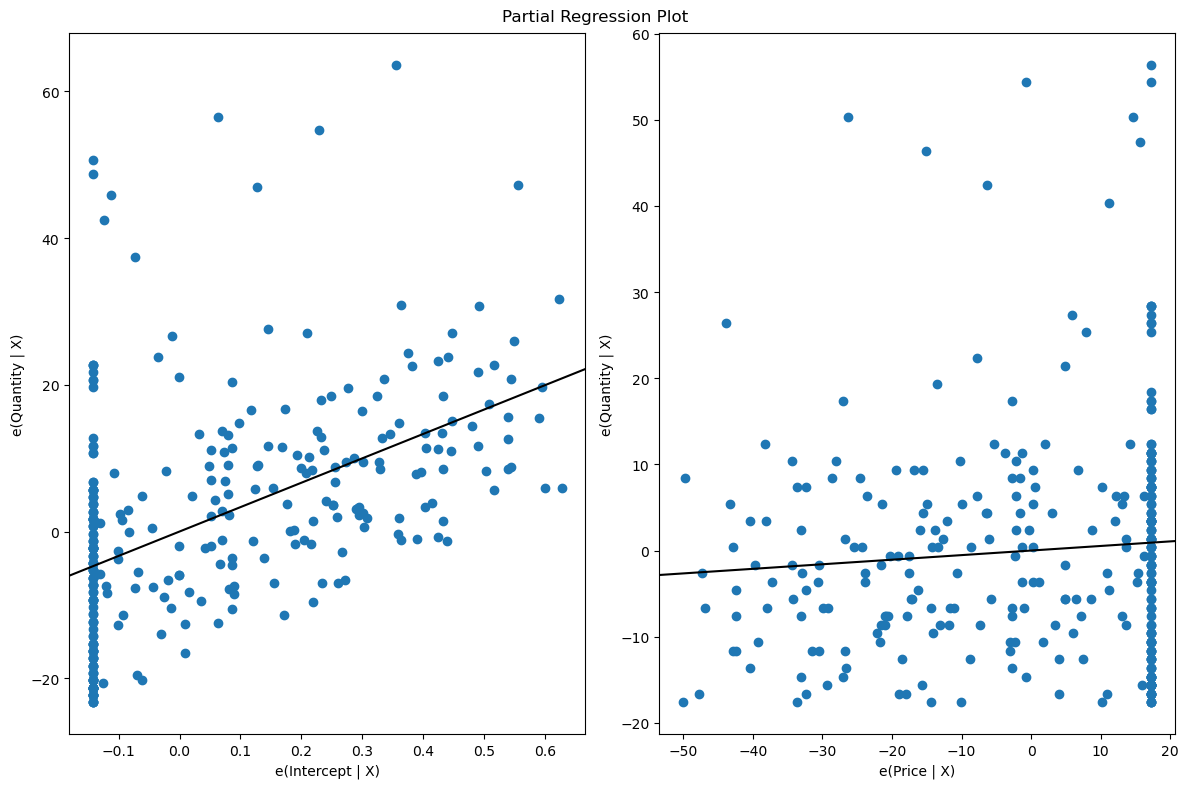

In [191]:
model_motorcycles = ols("Quantity ~ Price", data=motorcycles).fit()
print(model_motorcycles.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model_motorcycles, fig=fig)

In [143]:
classic_cars.PRODUCTCODE.unique()

array(['S10_1949', 'S10_4757', 'S10_4962', 'S12_1099', 'S12_1108',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4675',
       'S18_1129', 'S18_1589', 'S18_1889', 'S18_1984', 'S18_2238',
       'S18_2870', 'S18_3232', 'S18_3278', 'S18_3482', 'S18_3685',
       'S18_4027', 'S18_4721', 'S18_4933', 'S24_1046', 'S24_1444',
       'S24_1628', 'S24_2766', 'S24_2840', 'S24_2887', 'S24_2972',
       'S24_3191', 'S24_3371', 'S24_3432', 'S24_3856', 'S24_4048',
       'S24_4620', 'S700_2824'], dtype=object)

C:\Users\Eduardo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


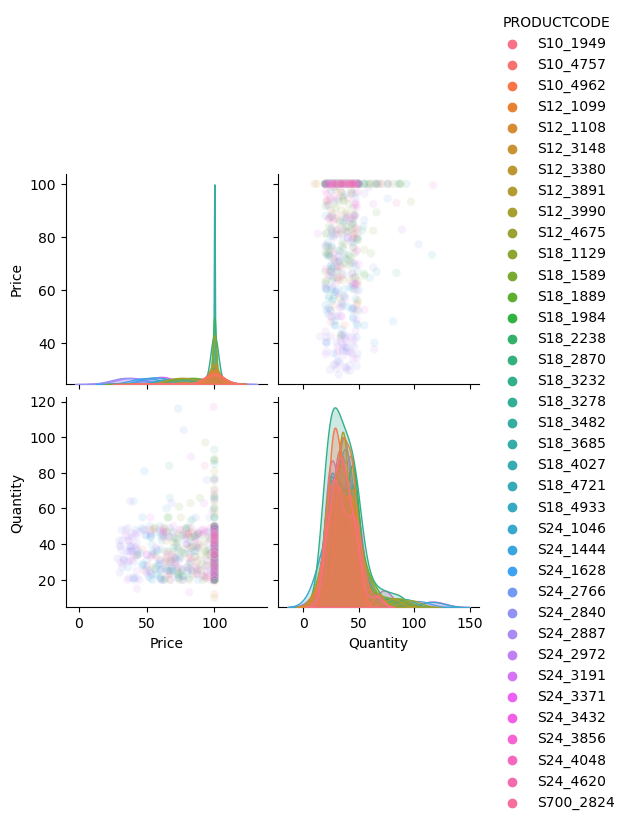

In [ ]:
sns.pairplot(classic_cars[['Price','Quantity','PRODUCTCODE']], hue = 'PRODUCTCODE', plot_kws={'alpha':0.1})


In [192]:
classic_cars_S24_3191 = aggregate_df[(aggregate_df['PRODUCTLINE'] == 'Classic Cars') & (aggregate_df['PRODUCTCODE'] == 'S24_3191')]
classic_cars_S24_3191

,PRODUCTLINE,PRODUCTCODE,COUNTRY,ORDERDATE,Quantity,Price,Total_transactions,UNIQUE_DAYS_WITH_SALES
2647,Classic Cars,S24_3191,Australia,2003-09-30,31,73.620000,1,1
2667,Classic Cars,S24_3191,Australia,2005-05-31,35,96.740000,1,1
2668,Classic Cars,S24_3191,Denmark,2003-10-31,20,77.050000,1,1
2669,Classic Cars,S24_3191,France,2004-03-31,40,79.620000,1,1
2670,Classic Cars,S24_3191,France,2004-04-30,26,81.330000,1,1
2671,Classic Cars,S24_3191,Singapore,2004-09-30,34,68.490000,1,1
2672,Classic Cars,S24_3191,Spain,2004-01-31,27,79.620000,1,1
2679,Classic Cars,S24_3191,Spain,2004-08-31,33,71.060000,1,1
2681,Classic Cars,S24_3191,Spain,2004-10-31,25,83.040000,1,1
2685,Classic Cars,S24_3191,Spain,2005-02-28,44,79.060000,1,1


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.1382
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.714
Time:                        18:59:39   Log-Likelihood:                -83.957
No. Observations:                  20   AIC:                             171.9
Df Residuals:                      18   BIC:                             173.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.1006     24.102      1.249      0.2

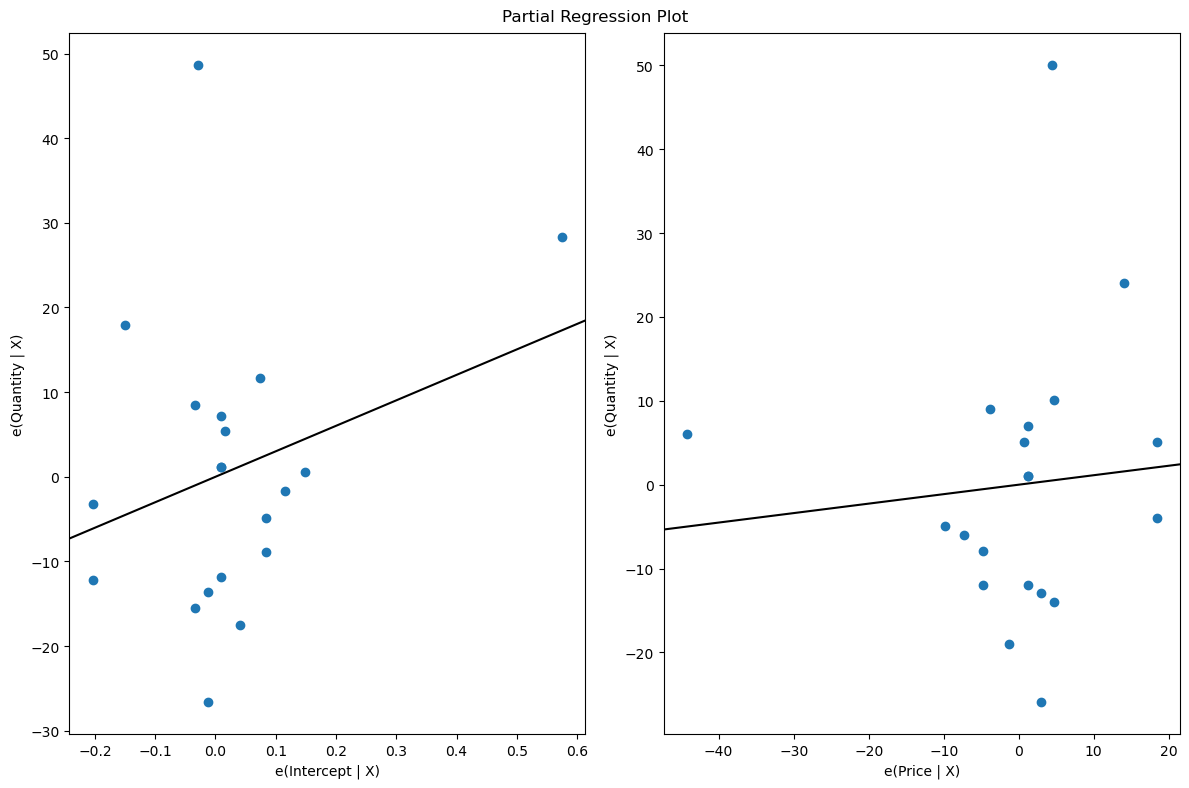

In [193]:
# This is for the combined data
model = ols("Quantity ~ Price", data=classic_cars_S24_3191).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

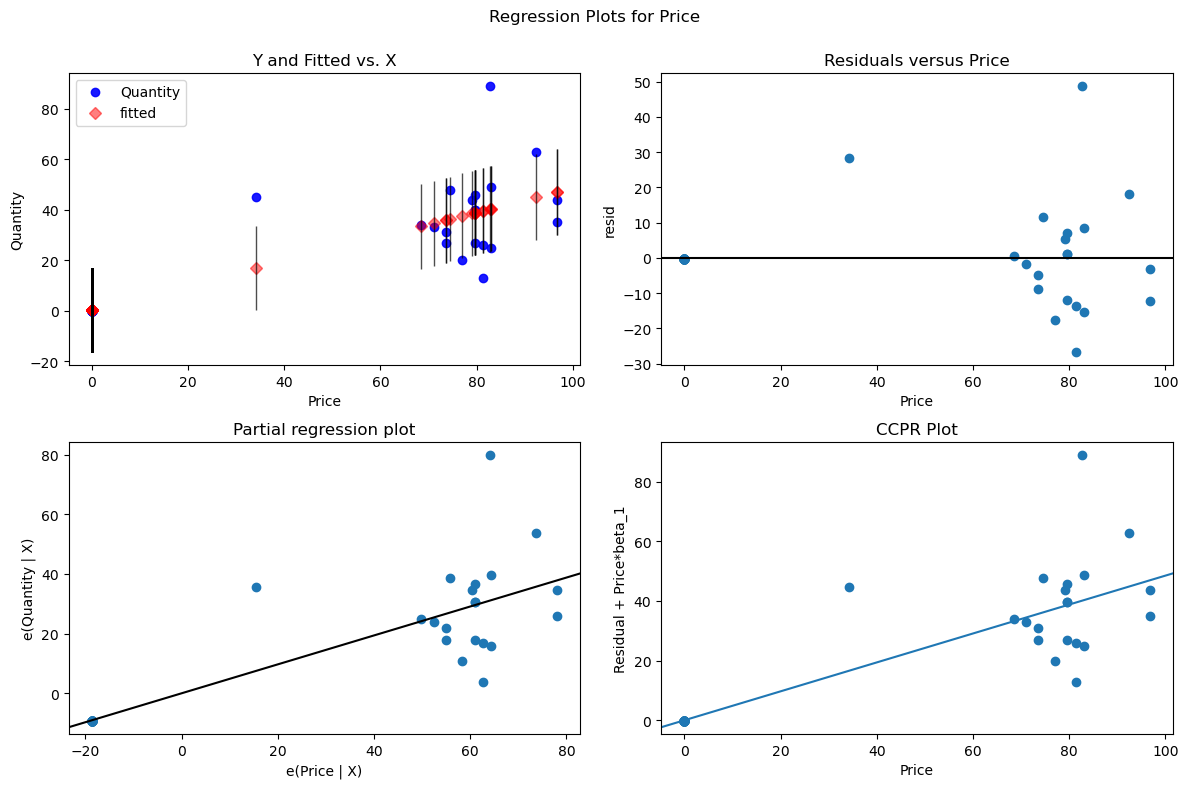

In [129]:
fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model, "Price", fig=fig)


In [150]:
def model_and_visualization(product_line, product_code):
    filtered_data = aggregate_df[(aggregate_df['PRODUCTLINE'] == 'Classic Cars') & (aggregate_df['PRODUCTCODE'] == product_code)]
    
    model = ols("Quantity ~ Price", data=filtered_data).fit()
    print(model.summary())
    
    fig = plt.figure(figsize=(12, 8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    
    
    

In [151]:
model_and_visualization('S10_4962')

TypeError: model_and_visualization() missing 1 required positional argument: 'product_code'

## 3.Ships

<Axes: xlabel='Price', ylabel='Quantity'>

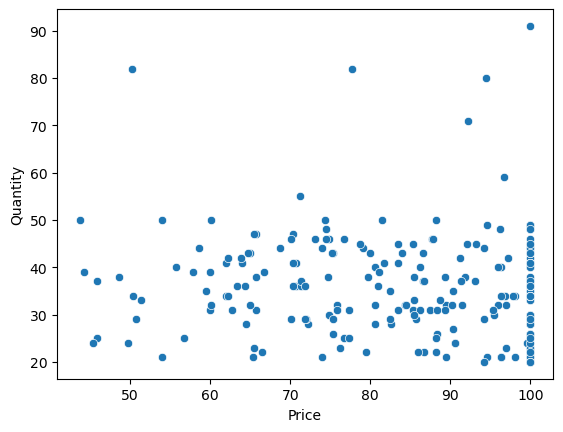

In [196]:
Ships = aggregate_df[aggregate_df['PRODUCTLINE'] == 'Ships']
classic_cars.head()
classic_cars.shape
sns.scatterplot(x = Ships.Price, y = Ships.Quantity )


In [85]:
# This is for the combined data
ships_model = ols("Quantity ~ Price", data=Ships).fit()
print(ships_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(ships_model, fig=fig)

NameError: name 'Ships' is not defined

## Optimial price for maxium profit

In [92]:
classic_cars_small.Price.min()

28.29

In [94]:
classic_cars_small.Price.max()

100.0

In [96]:
buying_price = classic_cars_small.Price.mean()

In [98]:
# random price points that make sense
start_price = 28
end_price = 101

In [107]:
test = pd.DataFrame(columns= [ "Price", "Quantity"])

In [108]:
test["Price"] = np.arange(start_price, end_price, 0.01)
test


,Price,Quantity
0,28.00,NaN
1,28.01,NaN
2,28.02,NaN
3,28.03,NaN
4,28.04,NaN
...,...,...
7295,100.95,NaN
7296,100.96,NaN
7297,100.97,NaN
7298,100.98,NaN


In [111]:
test["Quantity"] = classic_cars_model.predict(test['Price'])
test

,Price,Quantity
0,28.00,36.228212
1,28.01,36.228423
2,28.02,36.228634
3,28.03,36.228844
4,28.04,36.229054
...,...,...
7295,100.95,22.789439
7296,100.96,22.785396
7297,100.97,22.781353
7298,100.98,22.777310


In [114]:
test['Profit'] = (test["Price"] - buying_price) * test['Quantity']
test


,Price,Quantity,Profit
0,28.00,36.228212,-1467.177248
1,28.01,36.228423,-1466.823526
2,28.02,36.228634,-1466.469778
3,28.03,36.228844,-1466.116005
4,28.04,36.229054,-1465.762207
...,...,...,...
7295,100.95,22.789439,739.558370
7296,100.96,22.785396,739.655047
7297,100.97,22.781353,739.751623
7298,100.98,22.777310,739.848097


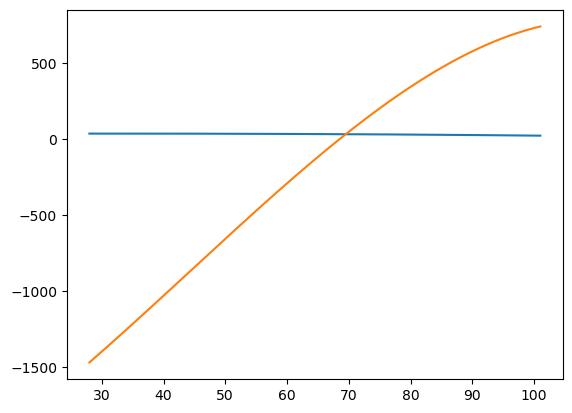

In [116]:
# lest visualize the tabular form above
plt.plot(test['Price'], test['Quantity'])
plt.plot(test['Price'], test['Profit'])
plt.show()

In [119]:
ind = np.where(test['Profit'] == test['Profit'].max())[0][0]
test.loc[[ind]]


,Price,Quantity,Profit
7299,100.99,22.773266,739.944469
